In [14]:
#Import Pacakges
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [15]:
#Retrieving the images and their labels 
#We iterate over all the classes and append images and their respective labels in the data and labels list. The PIL library is used to open image content into an array 
#To enhance the performance of the predictive model.

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [16]:
#Converting lists into numpy arrays. We need to convert the list into numpy arrays for feeding to the model.
#The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Converting the labels into one hot encoding
#Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
#categorical data must be converted to a numerical form.
#one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
#Building the model using tensorflow. we will build a CNN model (Convolutional Neural Network). CNN is best for image classification purposes.
#We compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorize.
#Flatten layer to squeeze the layers into 1 dimension
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
981/981 [==============================] - 70s 57ms/step - loss: 3.5224 - accuracy: 0.2487 - val_loss: 0.7614 - val_accuracy: 0.7586
Epoch 2/15
981/981 [==============================] - 72s 74ms/step - loss: 1.0084 - accuracy: 0.6959 - val_loss: 0.4024 - val_accuracy: 0.8771
Epoch 3/15
981/981 [==============================] - 57s 58ms/step - loss: 0.6585 - accuracy: 0.8007 - val_loss: 0.1968 - val_accuracy: 0.9411
Epoch 4/15
981/981 [==============================] - 57s 58ms/step - loss: 0.4122 - accuracy: 0.8763 - val_loss: 0.1803 - val_accuracy: 0.9457
Epoch 5/15
981/981 [==============================] - 57s 58ms/step - loss: 0.3368 - accuracy: 0.9023 - val_loss: 0.0913 - val_accuracy: 0.9745
Epoch 6/15
981/981 [==============================] - 58s 59ms/step - loss: 0.2978 - accuracy: 0.9145 - val_loss: 0.1074 - val_accuracy: 0.9703
Epoch 7/15
981/981 [==============================] - 59s 60ms/step - loss: 0.2831 - accuracy: 0.9189 - val_loss: 0.0849 - val_accuracy:

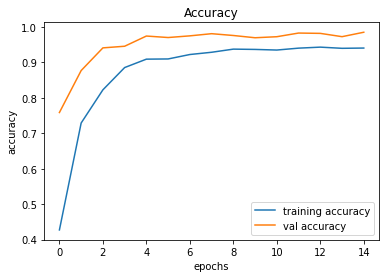

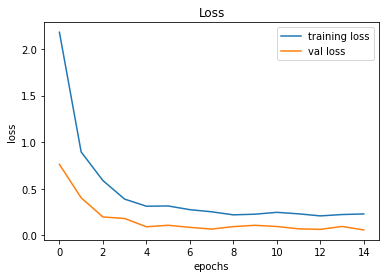

In [10]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#The model built is learning and working fine given that the accuracy and the validation accuracy increased
#significantly as they moved to the next epoch, and the loss and validation loss decreased.

In [11]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)


C:\Users\UFK96\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

#Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels.
#We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data.
#From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. We achieved a 95% accuracy in this model.

0.953840063341251
